In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

In [6]:
#print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

#sm = SMOTE(random_state=2)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

#print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

##print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Fold #1
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 18s 83us/step - loss: 0.4633 - val_loss: 0.3758
Epoch 2/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.3478 - val_loss: 0.3315
Epoch 3/150
213605/213605 [==============================] - 18s 86us/step - loss: 0.3190 - val_loss: 0.3214
Epoch 4/150
213605/213605 [==============================] - 17s 81us/step - loss: 0.3060 - val_loss: 0.3017
Epoch 5/150
213605/213605 [==============================] - 18s 82us/step - loss: 0.2955 - val_loss: 0.3096
Epoch 6/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2882 - val_loss: 0.2898
Epoch 7/150
213605/213605 [==============================] - 17s 81us/step - loss: 0.2843 - val_loss: 0.2891
Epoch 8/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2776 - val_loss: 0.3254
Epoch 9/150
213605/213605 [==============================] - 17s 81us

Epoch 75/150
213605/213605 [==============================] - 18s 85us/step - loss: 0.2289 - val_loss: 0.2418
Epoch 76/150
213605/213605 [==============================] - 17s 81us/step - loss: 0.2297 - val_loss: 0.2400
Epoch 77/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.2290 - val_loss: 0.2357
Epoch 78/150
213605/213605 [==============================] - 17s 81us/step - loss: 0.2286 - val_loss: 0.2372
Epoch 79/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2286 - val_loss: 0.2354
Epoch 80/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.2284 - val_loss: 0.2488
Epoch 81/150
213605/213605 [==============================] - 16s 76us/step - loss: 0.2283 - val_loss: 0.2384
Epoch 82/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2283 - val_loss: 0.2363
Epoch 83/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2293 - val_loss: 0.2478
Epoch 84/1

213605/213605 [==============================] - 19s 88us/step - loss: 0.2245 - val_loss: 0.2367
Epoch 150/150
213605/213605 [==============================] - 17s 82us/step - loss: 0.2242 - val_loss: 0.2369


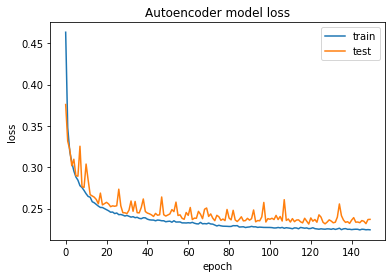

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 42s 196us/step - loss: 0.0931 - accuracy: 0.9712 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 2/50
213605/213605 [==============================] - 40s 187us/step - loss: 0.0097 - accuracy: 0.9986 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 3/50
213605/213605 [==============================] - 38s 180us/step - loss: 0.0081 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 4/50
213605/213605 [==============================] - 39s 181us/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 5/50
213605/213605 [==============================] - 38s 180us/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 6/50
213605/213605 [==============================] - 39s 180us/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 7/50
213605/213605 [=================

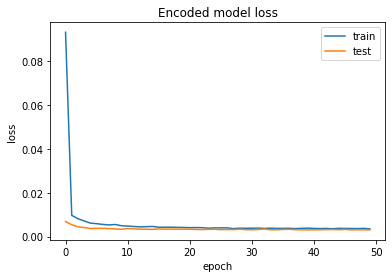

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993820398303418


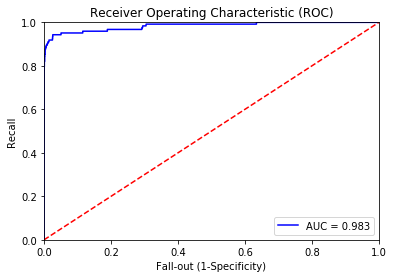

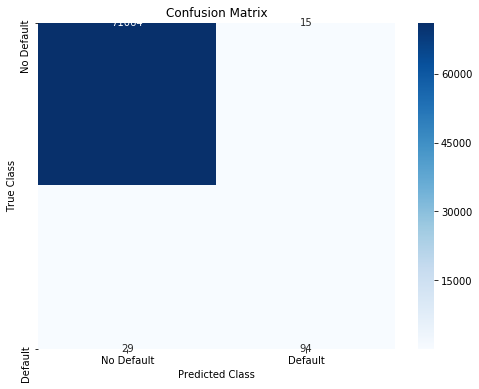

AUC(ROC): 0.8820083047409631
Precision: 0.8623853211009175
Recall: 0.7642276422764228
F1 score: 0.8103448275862069
False positives: 15
True positives: 94
False negatives: 29
True negatives: 71064
Fold #2
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 16s 76us/step - loss: 0.4668 - val_loss: 0.3580
Epoch 2/150
213605/213605 [==============================] - 16s 74us/step - loss: 0.3448 - val_loss: 0.3268
Epoch 3/150
213605/213605 [==============================] - 16s 76us/step - loss: 0.3206 - val_loss: 0.3031
Epoch 4/150
213605/213605 [==============================] - 17s 78us/step - loss: 0.3102 - val_loss: 0.3038
Epoch 5/150
213605/213605 [==============================] - 16s 76us/step - loss: 0.2995 - val_loss: 0.2901
Epoch 6/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2949 - val_loss: 0.2826
Epoch 7/150
213605/213605 [==============================] - 17s 77us/step - loss: 0.2879 -

213605/213605 [==============================] - 16s 77us/step - loss: 0.2434 - val_loss: 0.2411
Epoch 74/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2440 - val_loss: 0.2500
Epoch 75/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2441 - val_loss: 0.2620
Epoch 76/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2440 - val_loss: 0.2402
Epoch 77/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2435 - val_loss: 0.2416
Epoch 78/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2432 - val_loss: 0.2401
Epoch 79/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2435 - val_loss: 0.2371
Epoch 80/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2433 - val_loss: 0.2426
Epoch 81/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2435 - val_loss: 0.2470
Epoch 82/150
213605/213

213605/213605 [==============================] - 17s 77us/step - loss: 0.2392 - val_loss: 0.2329
Epoch 148/150
213605/213605 [==============================] - 17s 77us/step - loss: 0.2381 - val_loss: 0.2358
Epoch 149/150
213605/213605 [==============================] - 17s 78us/step - loss: 0.2396 - val_loss: 0.2349
Epoch 150/150
213605/213605 [==============================] - 16s 77us/step - loss: 0.2380 - val_loss: 0.2397


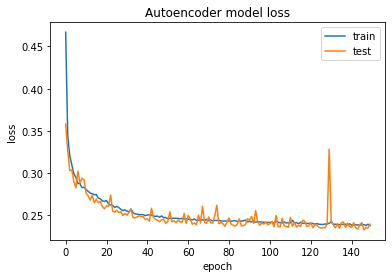

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 39s 184us/step - loss: 0.0393 - accuracy: 0.9908 - val_loss: 0.0080 - val_accuracy: 0.9990
Epoch 2/50
213605/213605 [==============================] - 38s 180us/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 0.0066 - val_accuracy: 0.9993
Epoch 3/50
213605/213605 [==============================] - 38s 180us/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.0073 - val_accuracy: 0.9993
Epoch 4/50
213605/213605 [==============================] - 38s 180us/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 5/50
213605/213605 [==============================] - 39s 180us/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0051 - val_accuracy: 0.9994
Epoch 6/50
213605/213605 [==============================] - 38s 180us/step - loss: 0.0067 - accuracy: 0.9988 - val_loss: 0.0051 - val_accuracy: 0.9994
Epoch 7/50
213605/213605 [=================

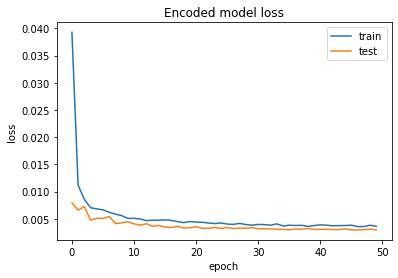

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994663071262043


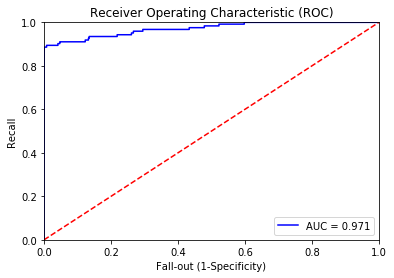

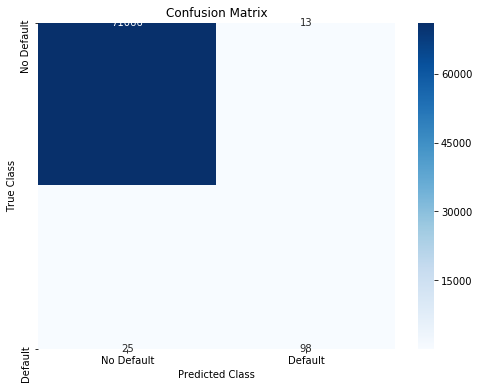

AUC(ROC): 0.8982825361955558
Precision: 0.8828828828828829
Recall: 0.7967479674796748
F1 score: 0.8376068376068375
False positives: 13
True positives: 98
False negatives: 25
True negatives: 71066
Fold #3
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 18s 83us/step - loss: 0.4708 - val_loss: 0.3845
Epoch 2/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.3585 - val_loss: 0.3370
Epoch 3/150
213605/213605 [==============================] - 17s 81us/step - loss: 0.3352 - val_loss: 0.3196
Epoch 4/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.3187 - val_loss: 0.3053
Epoch 5/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.3083 - val_loss: 0.3020
Epoch 6/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.3016 - val_loss: 0.2906
Epoch 7/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.2937 -

213605/213605 [==============================] - 17s 80us/step - loss: 0.2409 - val_loss: 0.2334
Epoch 74/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2396 - val_loss: 0.2336
Epoch 75/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2411 - val_loss: 0.2329
Epoch 76/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.2408 - val_loss: 0.2378
Epoch 77/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2403 - val_loss: 0.2324
Epoch 78/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.2406 - val_loss: 0.2320
Epoch 79/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2394 - val_loss: 0.2353
Epoch 80/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.2403 - val_loss: 0.2339
Epoch 81/150
213605/213605 [==============================] - 17s 80us/step - loss: 0.2406 - val_loss: 0.2962
Epoch 82/150
213605/213

213605/213605 [==============================] - 18s 83us/step - loss: 0.2330 - val_loss: 0.2278
Epoch 148/150
213605/213605 [==============================] - 18s 84us/step - loss: 0.2331 - val_loss: 0.2394
Epoch 149/150
213605/213605 [==============================] - 18s 82us/step - loss: 0.2327 - val_loss: 0.2239
Epoch 150/150
213605/213605 [==============================] - 18s 83us/step - loss: 0.2325 - val_loss: 0.2281


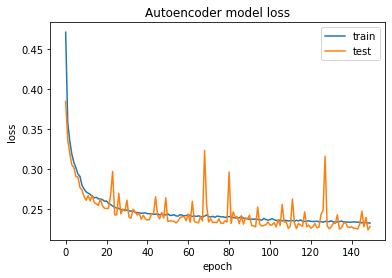

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 48s 223us/step - loss: 0.0463 - accuracy: 0.9888 - val_loss: 0.0083 - val_accuracy: 0.9991
Epoch 2/50
213605/213605 [==============================] - 47s 220us/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.0052 - val_accuracy: 0.9994
Epoch 3/50
213605/213605 [==============================] - 45s 212us/step - loss: 0.0081 - accuracy: 0.9988 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 4/50
213605/213605 [==============================] - 42s 195us/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 5/50
213605/213605 [==============================] - 40s 187us/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 6/50
213605/213605 [==============================] - 40s 188us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 7/50
213605/213605 [=================

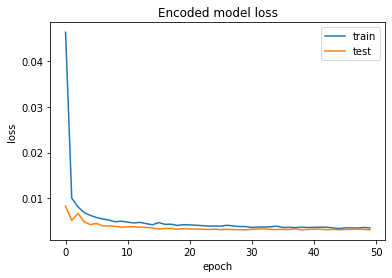

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994522625768939


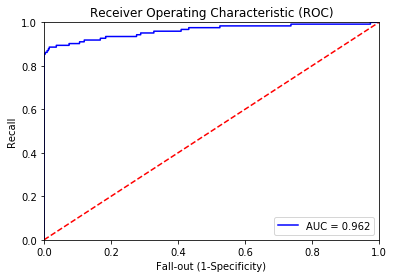

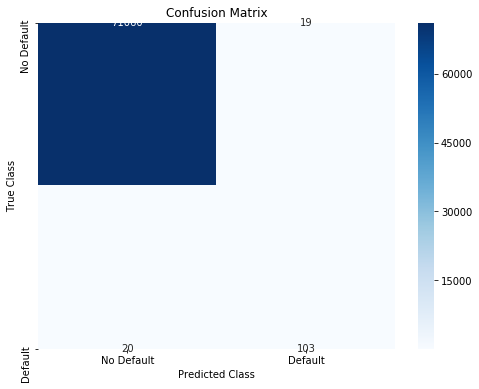

AUC(ROC): 0.918565532888689
Precision: 0.8442622950819673
Recall: 0.8373983739837398
F1 score: 0.8408163265306122
False positives: 19
True positives: 103
False negatives: 20
True negatives: 71060
Fold #4
Train on 213606 samples, validate on 71201 samples
Epoch 1/150
213606/213606 [==============================] - 18s 85us/step - loss: 0.4672 - val_loss: 0.3783
Epoch 2/150
213606/213606 [==============================] - 17s 81us/step - loss: 0.3553 - val_loss: 0.3355
Epoch 3/150
213606/213606 [==============================] - 17s 80us/step - loss: 0.3269 - val_loss: 0.3080
Epoch 4/150
213606/213606 [==============================] - 17s 80us/step - loss: 0.3137 - val_loss: 0.3002
Epoch 5/150
213606/213606 [==============================] - 17s 81us/step - loss: 0.3021 - val_loss: 0.2899
Epoch 6/150
213606/213606 [==============================] - 18s 84us/step - loss: 0.2945 - val_loss: 0.2805
Epoch 7/150
213606/213606 [==============================] - 18s 82us/step - loss: 0.2897 -

213606/213606 [==============================] - 17s 77us/step - loss: 0.2387 - val_loss: 0.2283
Epoch 74/150
213606/213606 [==============================] - 16s 76us/step - loss: 0.2382 - val_loss: 0.2341
Epoch 75/150
213606/213606 [==============================] - 16s 77us/step - loss: 0.2377 - val_loss: 0.2293
Epoch 76/150
213606/213606 [==============================] - 16s 77us/step - loss: 0.2360 - val_loss: 0.2303
Epoch 77/150
213606/213606 [==============================] - 16s 76us/step - loss: 0.2375 - val_loss: 0.2492
Epoch 78/150
213606/213606 [==============================] - 16s 77us/step - loss: 0.2365 - val_loss: 0.2284
Epoch 79/150
213606/213606 [==============================] - 16s 77us/step - loss: 0.2362 - val_loss: 0.2270
Epoch 80/150
213606/213606 [==============================] - 16s 76us/step - loss: 0.2378 - val_loss: 0.2290
Epoch 81/150
213606/213606 [==============================] - 16s 77us/step - loss: 0.2370 - val_loss: 0.2492
Epoch 82/150
213606/213

213606/213606 [==============================] - 17s 80us/step - loss: 0.2312 - val_loss: 0.2317
Epoch 148/150
213606/213606 [==============================] - 17s 80us/step - loss: 0.2319 - val_loss: 0.2239
Epoch 149/150
213606/213606 [==============================] - 17s 80us/step - loss: 0.2323 - val_loss: 0.2242
Epoch 150/150
213606/213606 [==============================] - 17s 79us/step - loss: 0.2318 - val_loss: 0.2235


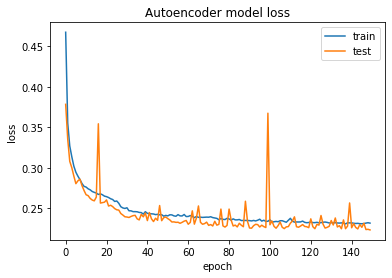

Train on 213606 samples, validate on 71201 samples
Epoch 1/50
213606/213606 [==============================] - 42s 198us/step - loss: 0.0407 - accuracy: 0.9908 - val_loss: 0.0086 - val_accuracy: 0.9988
Epoch 2/50
213606/213606 [==============================] - 41s 193us/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 3/50
213606/213606 [==============================] - 42s 195us/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 4/50
213606/213606 [==============================] - 43s 200us/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 5/50
213606/213606 [==============================] - 43s 200us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 6/50
213606/213606 [==============================] - 42s 195us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 7/50
213606/213606 [=================

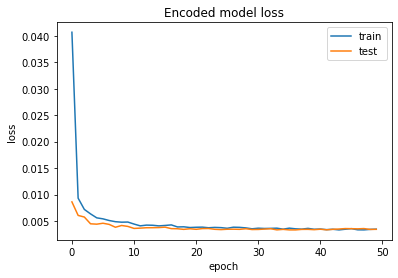

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993960758978104


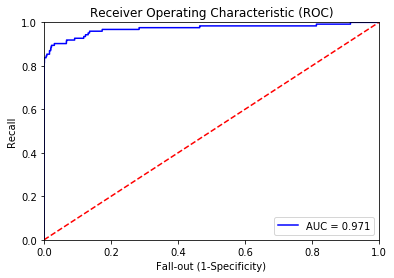

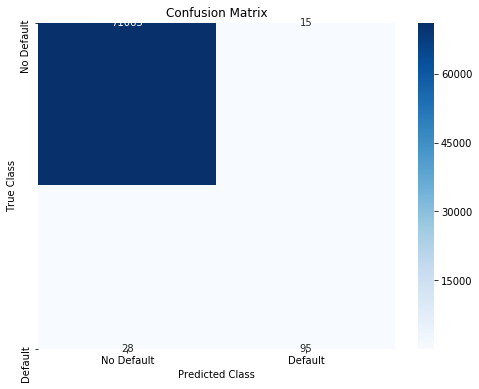

AUC(ROC): 0.8860733439068541
Precision: 0.8636363636363636
Recall: 0.7723577235772358
F1 score: 0.815450643776824
False positives: 15
True positives: 95
False negatives: 28
True negatives: 71063


In [7]:
nb_epoch = 50
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    scaler = preprocessing.StandardScaler()
    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

In [8]:

print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 71063.25
 Average fp = 15.5
 Average fn = 25.5
 Average tp = 97.5
 Average Precision = 0.8628318584070797
 Average Recall = 0.7926829268292683
 Average F1 score = 0.8262711864406779


In [9]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))
    




 Total tn: 284253
 Total fp: 62
 Total fn: 102
 Total tp: 390
 Total Precision = 0.8628318584070797
 Total Recall = 0.7926829268292683
 Total F1_score = 0.8262711864406779


In [10]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 18538.04157280922 seconds ---
18538.043570280075


In [11]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

5.149456547300021
